In [2]:
%load_ext autoreload
%autoreload 2

import sys         
sys.path.append('./../../src/') 
from data.ptbxl import TENSORS_DATA_PATH
import torch
from signals.ecg import create_multichannel_ecg

sampling_rate = 100
split = "train"

train_data = torch.load(TENSORS_DATA_PATH / f"records{sampling_rate}/{split}_data.pt")

In [3]:
data = train_data[5].T.numpy()
multi_ecg = create_multichannel_ecg(data, sampling_rate)

# **No source channel, without `R` alignment**

/home/shate/Desktop/praca_magisterska/medical_signal_representation/notebooks/ecg/./../../src/signals/ecg.py:408: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.beats_times = np.array(beats_times)


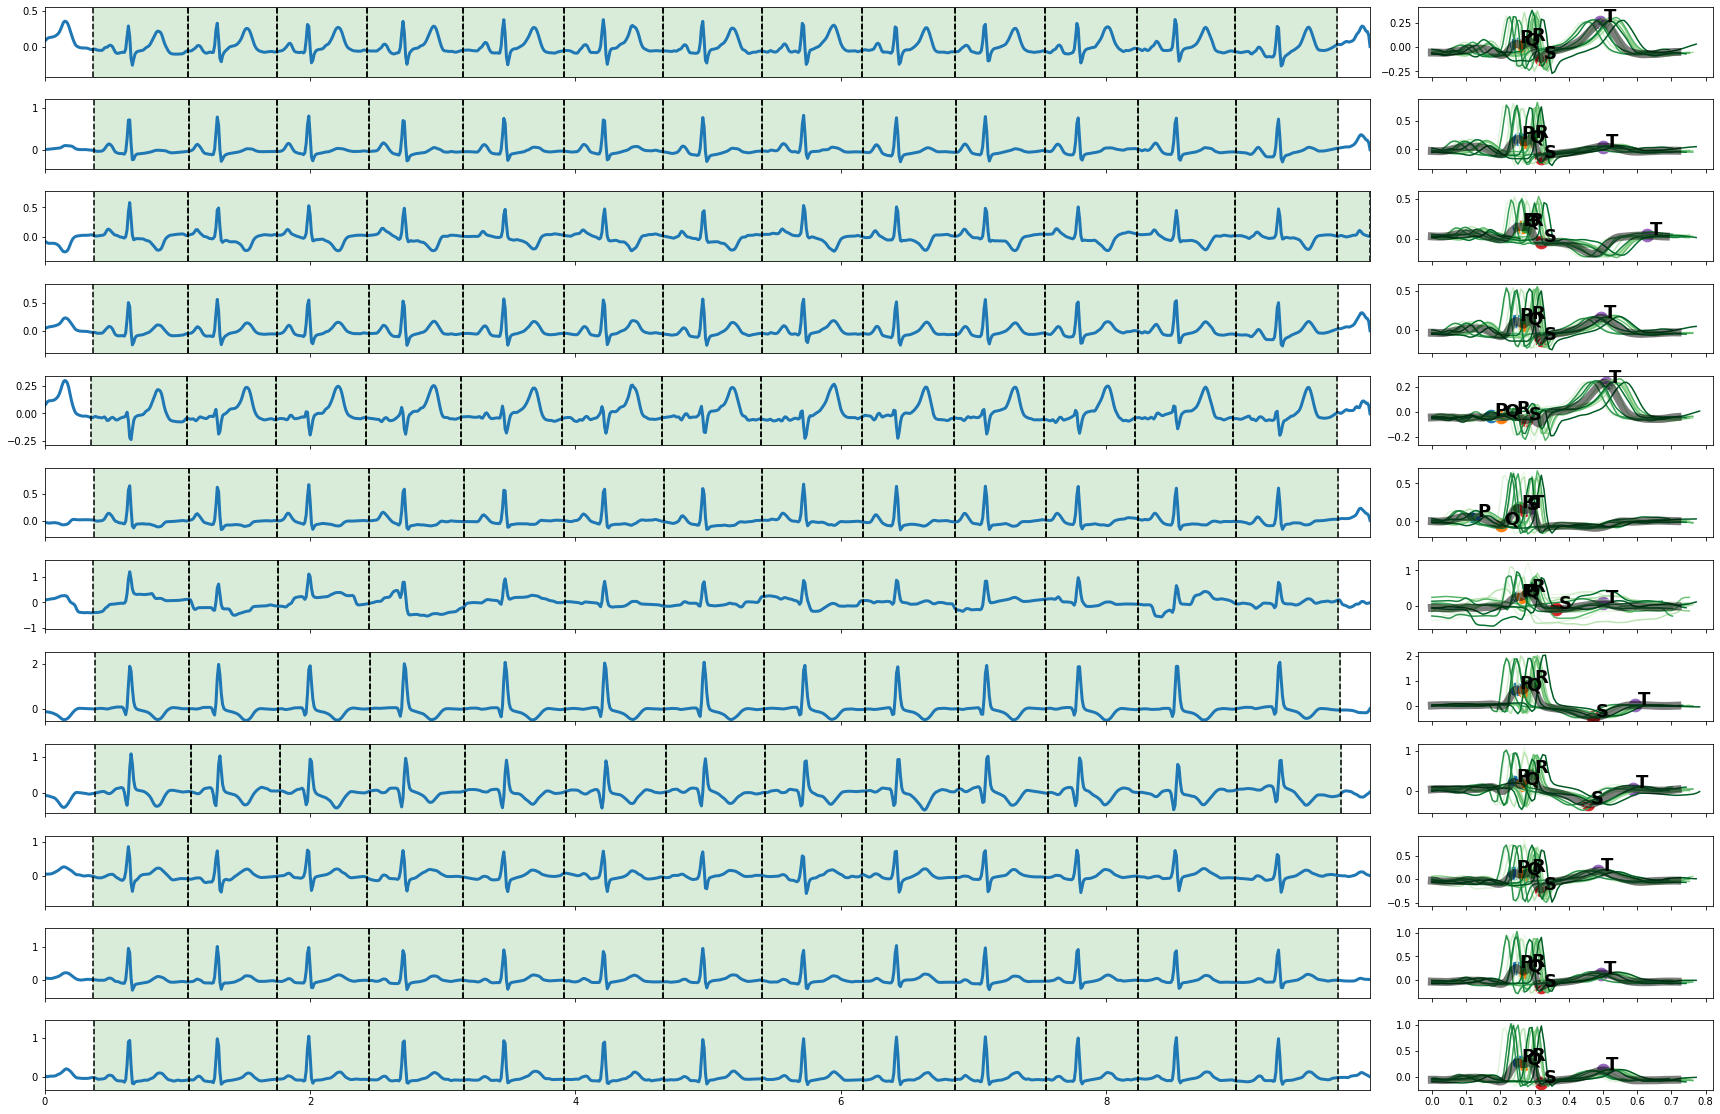

In [82]:
multi_ecg.get_beats(source_channel=None, align_to_r=False)
multi_ecg.plot_beats_segmentation()

# **Lead `II` ECG as source channel, without `R` alignment**

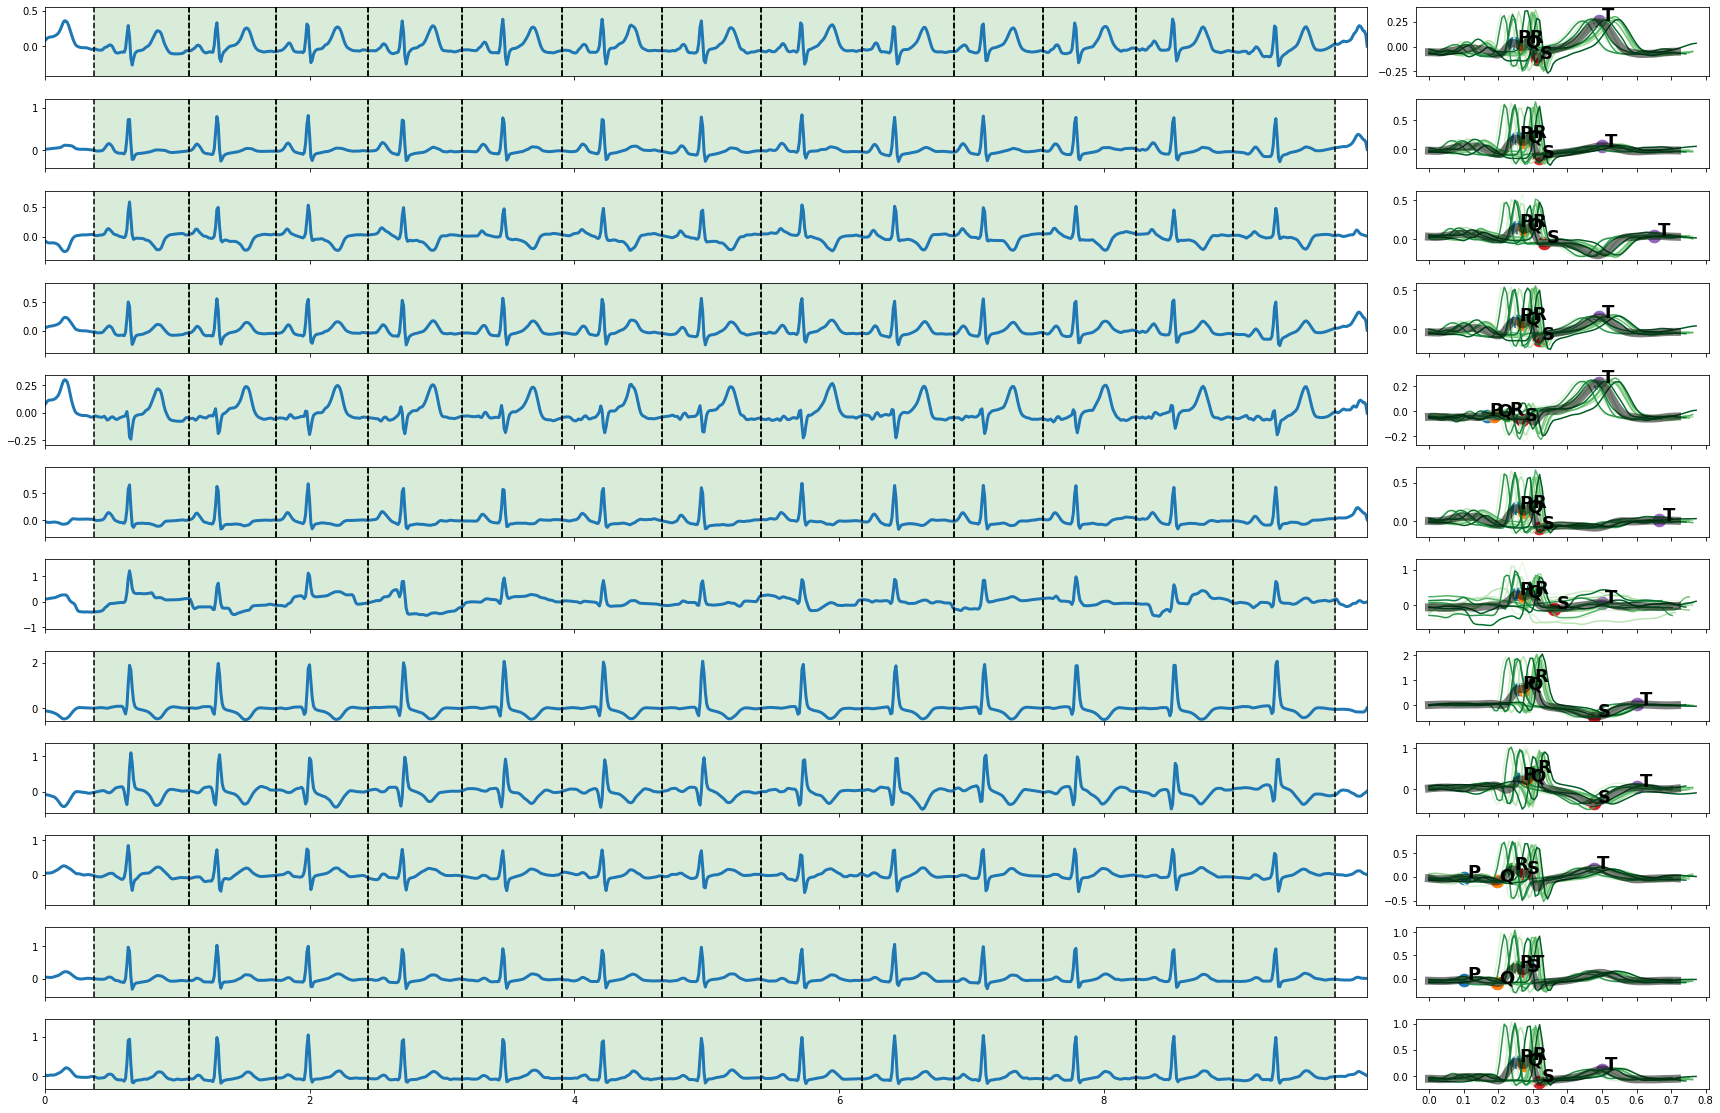

In [83]:
multi_ecg.get_beats(source_channel=2, align_to_r=False)
multi_ecg.plot_beats_segmentation()

# **Lead `II` ECG as source channel, with `R` alignment**

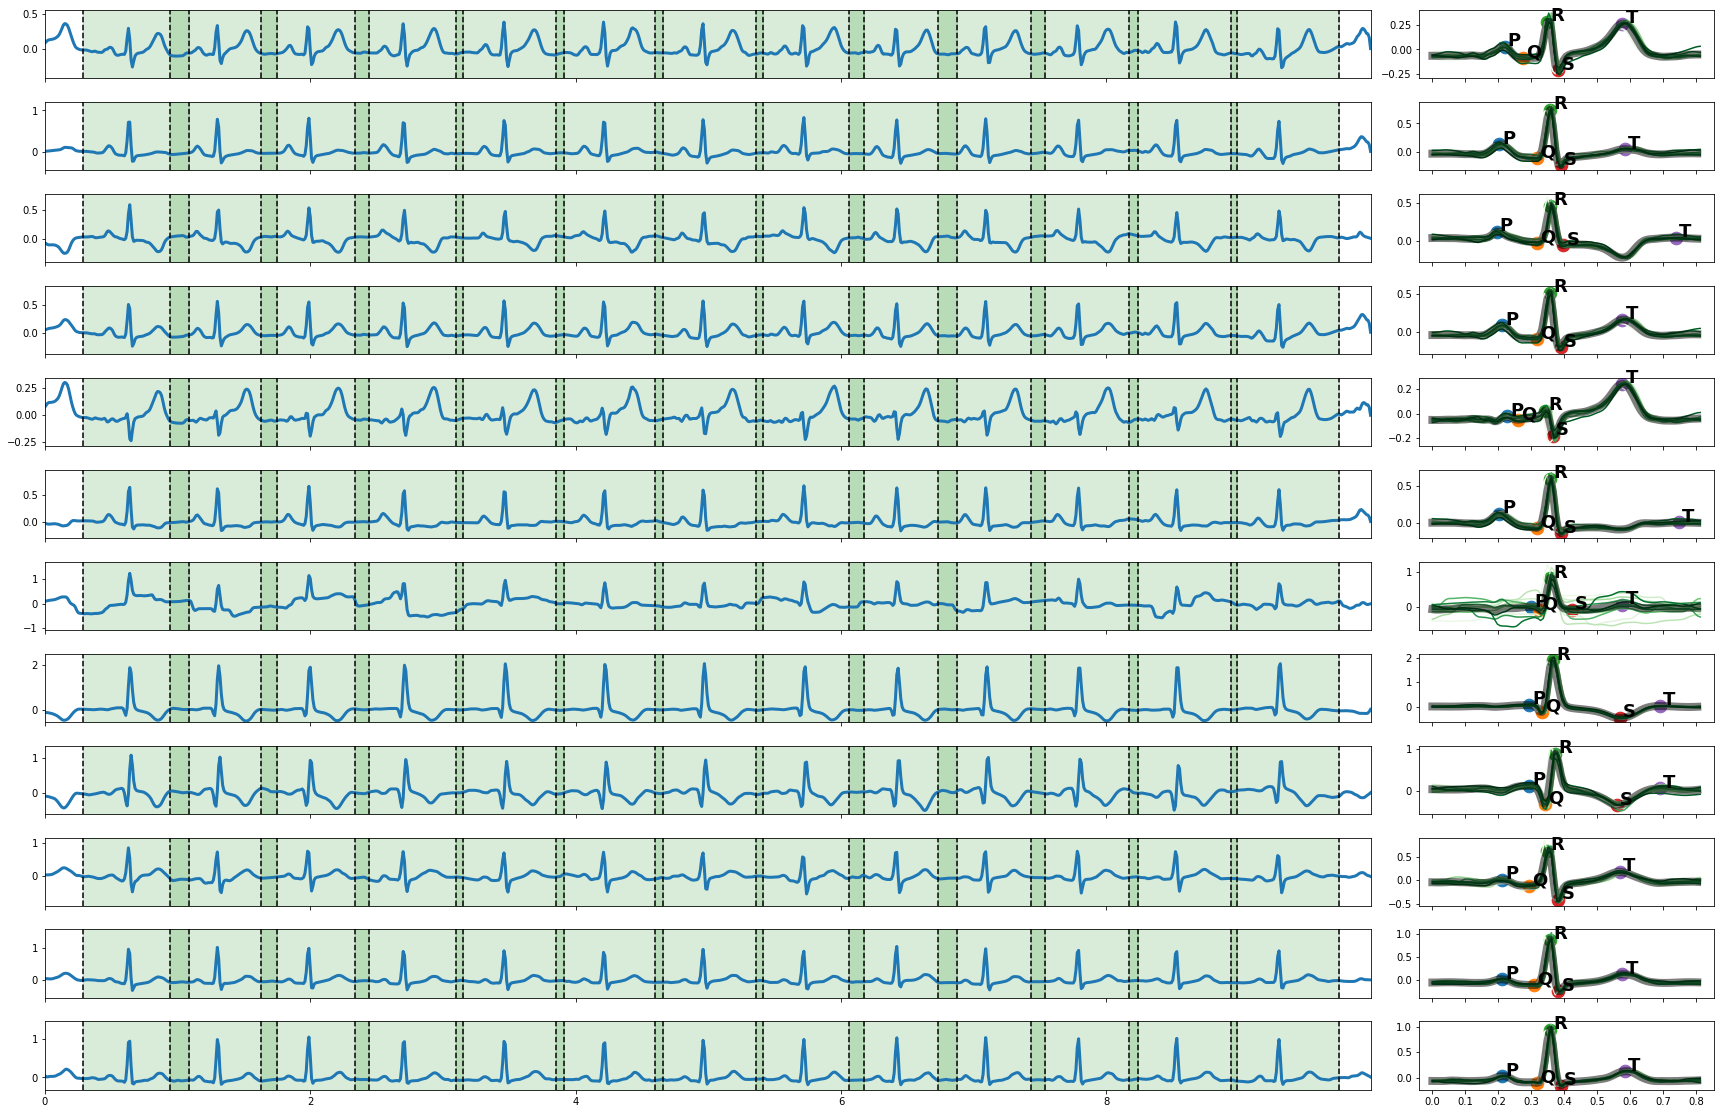

In [81]:
multi_ecg.get_beats(source_channel=2, align_to_r=True)
multi_ecg.plot_beats_segmentation()

# **Representations dimensionality**

In [80]:
multi_ecg.get_beats(source_channel=2, align_to_r=True)
whole_signal_waveforms = multi_ecg.get_waveform_representation()
whole_signal_features = multi_ecg.get_whole_signal_features_representation()
per_beat_waveforms = multi_ecg.get_per_beat_waveform_representation(n_beats=10)
per_beat_features = multi_ecg.get_per_beat_features_representation(n_beats=10)

representations = {
        'whole_signal_waveforms': whole_signal_waveforms,
        'whole_signal_features': whole_signal_features,
        'per_beat_waveforms': per_beat_waveforms,
        'per_beat_features': per_beat_features,
}
print(f"{'':<35} dimensionality\n")
for rep_name, rep in representations.items():
    print(f"{rep_name:<35} {rep.shape}")

                                    dimensionality

whole_signal_waveforms              (12, 1000)
whole_signal_features               (12, 58)
per_beat_waveforms                  (12, 10, 100)
per_beat_features                   (12, 10, 50)


OrderedDict([('whole_signal_features',
              OrderedDict([('basic_features',
                            OrderedDict([('mean', -0.00017800000000000083),
                                         ('std', 0.1316835916733744),
                                         ('median', -0.033),
                                         ('skewness', 1.1102506821232359),
                                         ('kurtosis', 2.0920258260541287)])),
                           ('hrv_features',
                            OrderedDict([('ibi_mean', 0.7216666666666667),
                                         ('ibi_std', 0.034359213546813726),
                                         ('R_val', 0.45961538461538465)]))])),
             ('agg_beat_features',
              OrderedDict([('basic_features',
                            OrderedDict([('mean', -0.009814625001012336),
                                         ('std', 0.10407301230928423),
                                         ('median', -0.

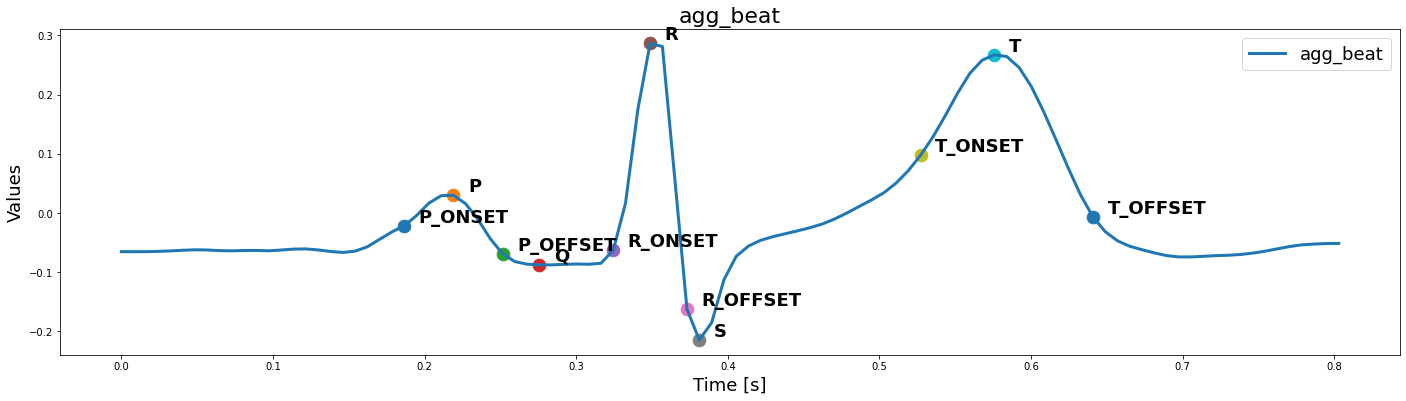

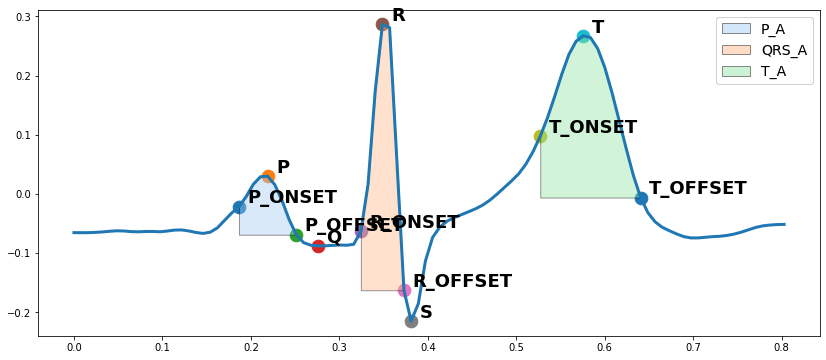

In [95]:
multi_ecg.signals[1].extract_features(return_arr=False, plot=True)